## **Section 1** Introduction (no tasks to complete)

In addition to introducing fundamental algorithms in Artificial Intelligence, it is crucial to understand how to apply these algorithms to solve real-world problems. This Programming Assignment presents a real-life problem that can be addressed using k-Nearest Neighbors (kNN) and k-Means clustering.

All living organisms are composed of *cells*. *Cells* produce *proteins*. Different types of *cells* generate *proteins* in varying quantities. For instance, a type A *cell* may produce 3 units of *protein* X, while a type B *cell* might produce only 1 unit. Cancer *cells* and normal *cells* often display distinct patterns of protein production.

Cell type annotation (identifying the type of cells) is essential for analyzing and interpreting large datasets. Currently, manual cell annotation, which is the predominant method, is limited by speed and the need for expert knowledge. We aim to develop a computational approach for cell annotation. **K-Nearest Neighbors** and **K-Means clustering** are suitable options for this task.

The datasets you will work with are organized so that each row corresponds to a cell, and each column represents a protein. For example, the first row indicates the protein levels of the first cell in the dataset.

## Notice

Upon completing Handout 3 (Advanced Python for Artificial Intelligence), you be able to finish Section 2 of this PA. While writing vectorized code may be challenging at first, don’t get discouraged; you will master it.

After completing Handout 5 (K-Nearest Neighbors Classifier), you will be able to finish Section 3 of this PA.

After completing Handout 6 (K-Means Clustering), you will be able to finish Section 4 of this PA.

**We recommend starting early, as you may have many other commitments (midterms, projects, assignments from other courses, etc.) as the deadline approaches.**

## **Section 2** Preprocessing and Principal Component Analysis (3.5 Points In Total)

In [367]:
# Import necessary libraries
# You are NOT allowed to import any additional library
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

The training set consists of  `95 rows` (95 cells) and `3,777 columns` (3777 proteins). Labels for all cells in the training set are provided, with each cell labeled by a `string` (e.g. "Normal" indicates a normal cell, while "CancerA" and "CancerB" refer to two different types of cancer cells). The testing set contains `19 rows` (19 cells) and `3,777 columns` (3777 proteins). Our goal is to predict the type of each cell or to cluster the cells based on protein abundance.

In [368]:
# Load training and test dataset, convert them from pandas dataframe to numpy array
if __name__ == "__main__":
  train_feature = pd.read_csv("train_features.csv", index_col=0)
  train_label = pd.read_csv("train_labels.csv", index_col=0)
  test_feature = pd.read_csv("test_features.csv", index_col=0)
  train_feature = train_feature.to_numpy()
  train_label = train_label.to_numpy()
  test_feature = test_feature.to_numpy()
  train_label = train_label.flatten()

### Quantile Normalization (1.25 points)

After loading the datasets, the first step is to preprocess them to ensure high-quality data (Total: 1.25 points).

#### Idea Behind Quantile Normalization

Quantile normalization is a standardization technique that ensures different datasets follow the same distribution. It is widely used in microarray data analysis, where the expression levels of genes are compared across different samples. The goal is to make the distributions of the datasets similar to each other.

##### Key Definitions
**Quantile Normalization**: A standardization technique that ensures different datasets follow the same distribution by:
1. Creating a reference distribution from column means
2. Mapping original values to this reference using ranks

**Rank Definition**:
- The position index if values were sorted in ascending order (0-based)
- For values in a row: lowest value → rank 0, next → rank 1, etc.
- Example: Values [3, 1, 4] → Ranks [1, 0, 2]

##### Overall Steps
Quantile normalization involves 3 steps:
1. **Calculate Rank Matrix**: Rank each row of the input dataset (say, *X*) from lowest to highest and obtain the ranking of each value (not the ranked dataset). (0.5 points, helper function: `calculate_rank`)
2. **Create Reference Distribution**: Create a reference distribution of the input dataset from lowest to highest, then calculate the mean value of each **column**. (0.25 points, helper function: `calculate_mean`)
3. **Value Substitution**: For each value in the array *X* with rank *i* (obtained from the `calculate_rank` function), substitute it with `mean[i]` (where `mean` is obtained from the `calculate_mean` function). (0.25 points, helper function: `substitute_mean`)

Then you will need to use these helper functions to complete the preprocessing (0.25 points, function: `quantile_normalization`).


##### Visual Example
Here is an example to help you understand the process:
```python
# Original Matrix       Rank Matrix
[[5, 3, 7],         →  [[1, 0, 2],
 [2, 8, 4]]             [0, 2, 1]]

# Original Matrix       Sorted Rows          Column Means
[[5, 3, 7],         →  [[3, 5, 7],        → [2.5, 4.5, 7.5]
 [2, 8, 4]]             [2, 4, 8]]

# Rank Matrix          Substitute Means
[[1, 0, 2],         → [[4.5, 2.5, 7.5],
 [0, 2, 1]]            [2.5, 7.5, 4.5]]
```
We will provide you with step by step instructions to help you complete this section successfully.


This section is worth a total of 1.25 points. We will check the accuracy of your code (but not vectorization), but we strongly recommend writing vectorized code here, except for the `substitute_mean` function, where you may need to use loops.

#### Implementation Steps (1.25 points)

##### Step 1: Calculate Rank Matrix (0.5 points)
**Function**: `calculate_rank(abundance_matrix)`

```python
# Input Example:
[[1, 3],
 [4, 2]]

# What happens:
1. Sort each row: [1,3] stays → [4,2] becomes [2,4]
2. Assign ranks based on original positions:
   First row ranks: 0 (value 1), 1 (value 3)
   Second row ranks: 1 (value 4), 0 (value 2)

# Output Rank Matrix:
[[0, 1],
 [1, 0]]
```

In [369]:
def calculate_rank(abundance_matrix):
    """
    Calculate the rank of protein abundance for each cell.

    You may consider using np.argsort https://numpy.org/doc/stable/reference/generated/numpy.argsort.html
    Be careful! You may wish to check what argsort outputs.

    Parameters:
    abundance_matrix: A 2D numpy array of shape (num_cells, num_proteins)
                      representing protein abundance in cells.

    Returns:
    A 2D numpy array of the same shape, containing the rank of protein abundance
    for each cell, where the lowest abundance is ranked 0.
    """
    ### Your code goes here ###
    return np.argsort(np.argsort(abundance_matrix, axis=1), axis=1)


    ### Your code ends here ###
    # Returns: rank of protein abundance in each cells (numpy array of shape ((number of cells, number of proteins))).


if __name__ == "__main__":
    example_array = np.array([[5, 3, 7], [2, 8, 4]])
    result = calculate_rank(abundance_matrix=example_array)
    print(result)
    # You are expected to get array output as below:
    # [[1 0 2]
    #  [0 2 1]]
    example_array = np.array([[1, 3], [4, 2]])
    result = calculate_rank(abundance_matrix=example_array)
    print(result)
    # You are expected to get array output as below:
    # [[0 1]
    #  [1 0]]

[[1 0 2]
 [0 2 1]]
[[0 1]
 [1 0]]


##### Step 2: Create Reference Distribution (0.25 points)
**Function**: `calculate_mean(abundance_matrix)`
```python
# Input
[[1, 3],
 [4, 2]]

# (sorted rows from original matrix):
[[1, 3],
 [2, 4]]

# Process:
1. Calculate column means:
   Column 0: (1 + 2)/2 = 1.5
   Column 1: (3 + 4)/2 = 3.5

# Reference Distribution:
[1.5, 3.5]
```

In [370]:
def calculate_mean(abundance_matrix):
    """
    Calculate the mean abundance of each protein across all cells.

    You may consider using np.mean https://numpy.org/doc/stable/reference/generated/numpy.mean.html
    You may consider using np.sort https://numpy.org/doc/stable/reference/generated/numpy.sort.html

    Parameters:
    abundance_matrix: A 2D numpy array of shape (num_cells, num_proteins)
                      representing protein abundance in cells.

    Returns:
    A 1D numpy array of shape (num_proteins,) containing the mean abundance.
    """
    ### Your code goes here ###
    # abundance_matrix = np.sort(abundance_matrix, axis=1) #axis=1 means that we are sorting column-wise i.e from left to right
    #abundance matrix array wont change as python creates a copy of the array and it wont change outside if this fucntion
    return np.mean(np.sort(abundance_matrix,axis=1), axis=0) #axis=0 means we are finding mean from top to bottom i.e row-wise
    ### Your code ends here ###


if __name__ == "__main__":
    example_array = np.array([[1, 3], [4, 2]])
    result = calculate_mean(abundance_matrix=example_array)
    print(result)
    # You are expected to get array [1.5,3.5]
    example_array = np.array([[5, 3, 7], [2, 8, 4]])
    result = calculate_mean([[5, 3, 7], [2, 8, 4]])
    print(result)
    # You are expected to get array [2.5, 4.5, 7.5]

[1.5 3.5]
[2.5 4.5 7.5]


##### Step 3: Value Substitution (0.25 points)
**Function**: `substitute_mean(X, mean_values, rank_matrix)`
```python
# Using previous examples: np.array([[1, 3], [4, 2]])
Rank Matrix:
[[0, 1],
 [1, 0]]

Reference Means:
[1.5, 3.5]

# Substitution Process:
- Value with rank 0 → 1.5
- Value with rank 1 → 3.5

# Final Output:
[[1.5, 3.5],
 [3.5, 1.5]]
```
Hint: You may need to pay attention to the data type of the input matrix.

In [371]:
def substitute_mean(abundance_matrix, mean_values, rank_matrix):
    """
    Substitute each value in the abundance matrix with the corresponding mean value based on ranks.

    IMPORTANT:
    You should NOT manipulate abundance_matrix (say, X) directly, for example, you should NOT use assignment operator (i.e. z=x and manipulate z)
    Otherwise the input array will ALSO be modified and lead to WRONG results in OTHER tasks!
    As a concerete example:
    def manipulate_array(input):
       input[0]=1
       return input
    test=np.array([0,1])
    result=manipulate_array(test)
    print(test) It will print [1,1]

    You may need to use loops here.

    Parameters:
    abundance_matrix: A 2D numpy array of shape (num_cells, num_proteins)
                      representing protein abundance in cells.
    mean_values: A 1D numpy array of shape (num_proteins,) containing the mean abundance.
    rank_matrix: A 2D numpy array of shape (num_cells, num_proteins) representing the ranks
                 of protein abundances in each cell.

    Returns:
    A 2D numpy array of shape (num_cells, num_proteins) where each value has been
    substituted by the corresponding mean value based on the rank.
    """
    ### Your code goes here ##
    return mean_values[rank_matrix] # this basically is an example of mapping
    ### Your code ends here ###


if __name__ == "__main__":
    example_array = np.array([[1.0, 3], [4, 2]])
    example_mean = np.array([1.5, 3.5])
    example_rank = np.array([[0, 1], [1, 0]])
    result = substitute_mean(
        abundance_matrix=example_array, mean_values=example_mean, rank_matrix=example_rank
    )
    print(result)
    # You are expected to get array [[1.5,3.5],[3.5,1.5]]

[[1.5 3.5]
 [3.5 1.5]]


##### Step 4: Integration (0.25 points)
**Function**: `quantile_normalization(abundance_matrix)`
```python
# Complete workflow:
Original → Rank Matrix → Sorted Matrix → Means → Substituted
```

In [372]:
def quantile_normalization(abundance_matrix):
    """
    Perform quantile normalization on a protein abundance matrix.

    Parameters:
    abundance_matrix: A 2D numpy array of shape (num_cells, num_proteins)
                      representing protein abundance in cells.

    Returns:
    A 2D numpy array of the same shape where each value has been substituted
    by the mean value of its corresponding rank across all cells.
    """
    ### Your code goes here ###
    rank = calculate_rank(abundance_matrix)
    mean = calculate_mean(abundance_matrix)
    return substitute_mean(abundance_matrix, mean, rank)
    ### Your code ends here ###


if __name__ == "__main__":
    example_array = np.array([[1.0, 3], [4, 2]])
    result = quantile_normalization(abundance_matrix=example_array)
    print(result)
    # You are expected to get array  [[1.5,3.5],[3.5,1.5]] (same as the previous code block!)

[[1.5 3.5]
 [3.5 1.5]]


### Z-Score Normalization (0.25 points)

Following quantile normalization, it's time to perform z-score normalization.

Standardize protein abundances to have **μ=0** and **σ=1** per protein (column-wise normalization).

**Mathematical Formula**:
For each value *X* in column *j*:
```math
Z = \frac{X - \mu z}{\sigma j}
```
Where:
- $\mu_j$ = Mean of column *j*
- $\sigma_j$ = Population standard deviation of column *j*

**Implementation Steps**:
1. **Column Statistics**:
   - Calculate $\mu_j$ for each column
   - Calculate $\sigma_j$ for each column
2. **Normalization**:
   - Center values: Subtract column mean
   - Scale values: Divide by column std

 (0.25 points, function: `z_score_normalization`)

**Visual Example**:
```python
Original Matrix:
[[1,  3],
 [4,  2]]

Step 1: Calculate Column Statistics
| Column | Values | Mean (μ) | Std (σ)       | Calculation            |
|--------|--------|-----------|----------------|------------------------|
| 0      | 1, 4   | 2.5       | √[(2.25+2.25)/2] = 1.5 |
| 1      | 3, 2   | 2.5       | √[(0.25+0.25)/2] = 0.5 |

Step 2: Apply Z-Score Formula
[[(1-2.5)/1.5, (3-2.5)/0.5] → [-1,  1]
 [(4-2.5)/1.5, (2-2.5)/0.5] → [ 1, -1]]
```

This section is worth a total of 0.25 points. We will check the accuracy of your code, but we strongly recommend writing vectorized code here.

In [373]:
def z_score_normalization(abundance_matrix):
    """
    Perform Z-score normalization on a protein abundance matrix.

    You may consider using np.mean (https://numpy.org/doc/stable/reference/generated/numpy.mean.html)
    You may consider using np.std (https://numpy.org/doc/stable/reference/generated/numpy.std.html)

    Parameters:
    abundance_matrix: A 2D numpy array of shape (num_cells, num_proteins)
                      representing protein abundance in cells.

    Returns:
    A 2D numpy array of the same shape where each value has been normalized
    using the Z-score formula: (X - mean) / std.
    """
    ### Your code goes here ###
    column_mean = np.mean(abundance_matrix, axis=0)
    standard_deviation = np.std(abundance_matrix, axis=0)
    z_score = (abundance_matrix-column_mean)/standard_deviation
    return z_score
    ### Your code ends here ###


if __name__ == "__main__":
    example_array = np.array([[1.0, 3], [4, 2]])
    result = z_score_normalization(abundance_matrix=example_array)
    print(result)
# You are expected to get [[-1,1],[1,-1]]

[[-1.  1.]
 [ 1. -1.]]


### Preprocess Dataset: Put them together (0.25 points)

We have finished all functions needed to pre-process the dataset. Now it's time to pre-process BOTH training and testing datasets and visualize the training set.

1. First apply quantile normalization to the input dataset, and
2. then apply z_score_normalization to it

(function `preprocess_datasets`, 0.25 points).

In [374]:
def preprocess_datasets(abundance_matrix):
    """
    Preprocess the protein abundance matrix by applying quantile normalization followed by Z-score normalization.

    Parameters:
    abundance_matrix: A 2D numpy array of shape (num_cells, num_proteins)
                      representing protein abundance in cells.

    Returns:
    A 2D numpy array of the same shape, representing the processed dataset after
    quantile normalization and Z-score normalization.
    """
    ### Your code goes here ###
    q_n = quantile_normalization(abundance_matrix)
    z_n = z_score_normalization(q_n)
    return z_n
    ### Your code ends here ###


if __name__ == "__main__":
    example_array = np.array([[1.0, 3], [4, 2]])
    result = preprocess_datasets(abundance_matrix=example_array)
    print(result)
# You are expected to get [[-1,1],[1,-1]]

[[-1.  1.]
 [ 1. -1.]]


In [375]:
if __name__ == "__main__":
    processed_train_feature = preprocess_datasets(abundance_matrix=train_feature)
    processed_test_feature = preprocess_datasets(abundance_matrix=test_feature)

### Preprocess Train and Test Labels (0.75 points)

The values currently stored in the array `training_label` are strings (e.g., "Normal"). It is unwise to use these string values as inputs for KNN classifiers, as this complicates the code. Therefore, we will transform these string values into integers.

- "Normal" will be mapped to 0
- "CancerA" will be mapped to 1
- "CancerB" will be mapped to 2

You may assume that there are only these three types of cells (function: `label_to_integer`, 0.75 points).

This section is worth a total of 0.75 points. The first 0.5 points will be awarded based on the accuracy of the result, while an additional 0.25 points will be awarded for vectorization (i.e., no loops).

**Note:** Code that produces incorrect results will receive a score of 0 for vectorization.

In [376]:
# we are doing this because KNN is used only for numerical data not categorical data
def label_to_integer(label):
    """
    Convert string labels to integer labels.

    You may consider using np.where
    (https://numpy.org/doc/stable/reference/generated/numpy.where.html)

    Parameters:
    labels: A 1D numpy array of shape (num_cells,) containing string labels for each cell.

    Returns:
    A 1D numpy array of the same shape, where each string label has been converted
    to an integer: "Normal" -> 0, "CancerA" -> 1, "CancerB" -> 2.
    """
    ### Your code goes here ###
    integer_labels = np.zeros(label.shape,dtype='int')
    integer_labels = np.where(label=='CancerA',1,integer_labels) #only where CancerA is present that is only changed otherwise the whole array remains the same as integer_labels
    integer_labels = np.where(label=='CancerB',2,integer_labels)
    return integer_labels
    ### Your code ends here ###
if __name__ == "__main__":
    example_array = np.array(["CancerA", "Normal", "CancerB"])
    example_array = example_array.astype(object)
    result = label_to_integer(label=example_array)
    print(result)
    # You are expected to get [1,0,2]

[1 0 2]


In [377]:
if __name__ == "__main__":
    train_label = label_to_integer(label=train_label)

### Principal Component Analysis and Visualization (1 point)

After preprocessing the dataset, we'll now visualize it to gain meaningful insights. However, we face a significant challenge: our training dataset contains over 3,000 features **(If your dataset has protein abundance measurements for 3,000 proteins across cells, each protein is a feature.)**, making direct visualization impossible. To address this, we need to employ dimension reduction techniques to transform our data into a more manageable form.

To visualize the dataset in a 2D scatter plot, we must transform the array into one with shape `(number_of_cells, 2)`. Principal Component Analysis (PCA) is our chosen method for reducing the dimensions of this large dataset. While PCA is covered in linear algebra courses (MATH 2111/2121/2131), understanding its theoretical foundations isn't required for this task. Your primary responsibility is to specify the value of `component_number` based on the provided hints and scikit-learn documentation.

Once you've specified the component number, you'll obtain an array called `principal_component` with shape `(number_of_cells, component_number)`. This array will be used to create a 2D scatter plot. Each row of the `principal_component` array represents the coordinates for one cell, where the first value corresponds to the x-axis value and the second value corresponds to the y-axis value. For example, if a row in `principal_component` contains [1,2], that cell will be plotted at coordinate (1,2) on the scatter plot.

To distinguish between different cell types in our visualization, we'll use color coding. Each cell type `i` will be assigned a color from `color_list[i]`. The function `PCA_and_visualization` must return 4 values.

### Marking Scheme
Total score: 1.0
- Correct component number: 0.25 points
- Visualization coordinates:
  - X-axis values: 0.25 points
  - Y-axis values: 0.25 points
- Correct color mapping: 0.25 points

All points are awarded based on accuracy of implementation.

[ 0.05452972 -0.75317558 -2.1504673   2.84911316]
[-0.34932293  0.24026348  0.02214459  0.08691486]
['r' 'r' 'b' 'b']


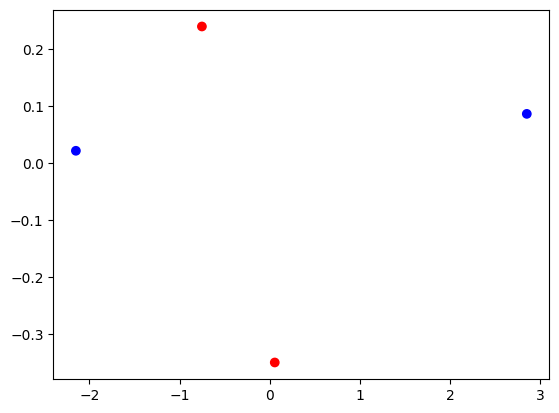

In [378]:
def PCA_and_visualization(abundance_matrix, label):
    """
    Perform PCA on the protein abundance matrix and visualize the results in a 2D scatter plot.

    Parameters:
    abundance_matrix: A 2D numpy array of shape (num_cells, num_proteins)
                      representing protein abundance in cells.
    labels: A 1D numpy array of shape (num_cells,) containing integer labels for each cell.

    Returns:
    x: The x-coordinates of the points in the scatter plot.
    y: The y-coordinates of the points in the scatter plot.
    colors: A list of colors corresponding to each label for visualization.
    component_number: The number of components you have kept.
    """
    """
    Specify the number of components you would like to keep.
    Hint: We would need to visualize our dataset in a 2D scatter plot.
    Hint: You may try different numbers of component number and print out the result.
    """
    component_number = -1 # Note: This is a placeholder value and you need to change it in your code below.
    ### Your code goes here ###
    component_number = 2
    from sklearn.decomposition import PCA
    ### Your code ends here ###
    pca = PCA(n_components=component_number, svd_solver= "arpack", random_state=2)
    principal_component = pca.fit_transform(abundance_matrix)
    x = principal_component[:,0]
    y = principal_component[:,1]
    """
    You need to understand the meaning of input parameters x, y and c into function plt.scatter().
    Hint: You may check document as well as usage at https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
    and https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html#sphx-glr-gallery-shapes-and-collections-scatter-py.
    Hint: You do not need to care about inputs other than x,y and c.
    Hint: You have obtained an array principal_component of shape (number of cells, component_number), and you would like to visualize it via a 2D scatter plot.
    The 2 values in each row of array principal_component represent the coordinate of a point.
    You may consider using np.where (https://numpy.org/doc/stable/reference/generated/numpy.where.html)
    """
    color_list = ["r", "b", "g", "c"]
    colors = np.zeros(len(label))
    colors = colors.astype("str")
    ### Your code goes here ###
    colors = np.where(label == 0, color_list[0], np.where(label == 1, color_list[1], np.where(label == 2, color_list[2], color_list[3])))  # Replace labels with colors

    return x, y, colors, component_number
    ### Your code ends here ###


if __name__ == "__main__":
    example_array = np.array([[-1, -1, 1], [-2, -1, 1], [-3, -2, 1], [1, 1, 1]])
    example_labels = np.array([0, 0, 1, 1])
    example_labels = example_labels.astype(object)
    result_x, result_y, result_colors, _ = PCA_and_visualization(
        abundance_matrix=example_array, label=example_labels
    )
    print(result_x)
    # You are expected to get [ 0.05452972 -0.75317558 -2.1504673 2.84911316]
    print(result_y)
    # You are expected to get [ 0.34932293 -0.24026348 -0.02214459 -0.08691486]
    # You may also get [-0.34932293  0.24026348  0.02214459  0.08691486] check Q2.1 under FAQ on Assignment 1 page.
    print(result_colors)
    # You are expected to get ['r', 'r', 'b', 'b']
    plt.scatter(x=result_x, y=result_y, c=result_colors)
    plt.show()

We have finished all functions needed to visualize the dataset. Now it's time to visualize the training set. As we do not have corresponding labels of testing set, we are not able to visualize it.

In [379]:
def visualize_processed_datasets(X, label):
    x, y, colors, _ = PCA_and_visualization(X, label)
    plt.scatter(x=x, y=y, c=colors)
    plt.show()

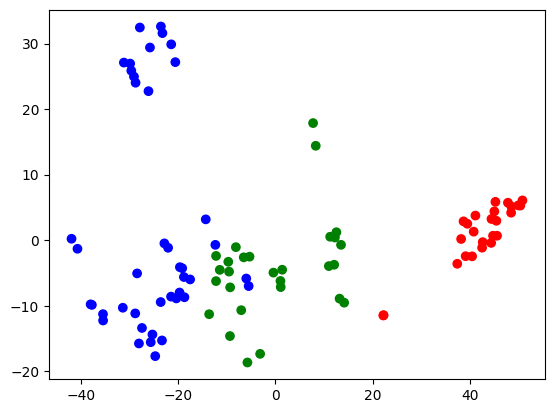

In [380]:
if __name__ == "__main__":
    visualize_processed_datasets(processed_train_feature, train_label)

## **Section 3** KNN Classifer for Supervised Cell Type Annotation (8 Points in Total)

Recall the steps of building a KNN classifier:

1. Prepare training data and test data. (Finished!)

2. Select a value K.

3. Determine which distance function is to be used.

4. Compute the distance of the new data to its n training samples.

5. Sort the distances obtained and take the K-nearest data samples.

6. Assign the test sample to the class based on the majority vote of its K nearest neighbors.

### Distance Metrics in K-Nearest Neighbors (1.5 Points)

K-Nearest Neighbors (KNN) is a classification algorithm that predicts a test sample's class based on its proximity to labeled training samples. The algorithm examines the **"distance"** between the test sample's features and those of the training samples, ultimately assigning the class that appears most frequently among the K nearest neighbors.

For this implementation, we need to calculate distances between feature vectors. You'll implement two fundamental distance metrics: Manhattan Distance and Euclidean Distance. These functions will compute distances between each point in the testing dataset and every point in the training dataset.

The Manhattan Distance, also known as L1 norm or city block distance, measures the sum of absolute differences between coordinates:

$\displaystyle d(X, Y) = \sum_{i=1}^{n} | x_i - y_i |$

The Euclidean Distance, also known as L2 norm, measures the straight-line distance between two points in n-dimensional space:

$\displaystyle d(X, Y) =\sqrt{\sum_{i=1}^{n} | x_i - y_i |^2}$

#### Marking Scheme
Each distance function implementation is worth 0.75 points, divided as follows:
- Accuracy of implementation: 0.5 points
- Efficient vectorization: 0.25 points

Total points available: 1.5 points (0.75 × 2)

In [381]:
def calculate_manhattan_distance(feature_train, feature_test):
    """
    Calculate the Manhattan distance between training and testing feature matrices.

    You may consider using np.expand_dims https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html
    You may consider using np.sum https://numpy.org/doc/stable/reference/generated/numpy.sum.html
    You may consider using np.abs https://numpy.org/doc/stable/reference/generated/numpy.abs.html

    Parameters:
    feature_train: A 2D numpy array of shape (num_cells_train, num_proteins)
                   representing protein abundance in the training set.
    feature_test: A 2D numpy array of shape (num_cells_test, num_proteins)
                  representing protein abundance in the testing set.

    Returns:
    A 2D numpy array of shape (num_cells_test, num_cells_train) representing the
    Manhattan distance between each test cell and each train cell.
    """
    ### Your code goes here ###
    manhattan_distance = np.sum(np.abs(feature_test[:, np.newaxis, :] - feature_test[np.newaxis, :, :]), axis=2)
    return manhattan_distance
    ### Your code ends here ###


def calculate_euclidean_distance(feature_train, feature_test):
    """
    Calculate the Euclidean distance between training and testing feature matrices.

    You may consider using np.expand_dims https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html
    You may consider using np.sum https://numpy.org/doc/stable/reference/generated/numpy.sum.html
    You may consider using np.sqrt https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html
    You may consider using np.square https://numpy.org/doc/stable/reference/generated/numpy.square.html

    Parameters:
    feature_train: A 2D numpy array of shape (num_cells_train, num_proteins)
                   representing protein abundance in the training set.
    feature_test: A 2D numpy array of shape (num_cells_test, num_proteins)
                  representing protein abundance in the testing set.

    Returns:
    A 2D numpy array of shape (num_cells_test, num_cells_train) representing the
    Euclidean distance between each test cell and each train cell.
    """
    ### Your code goes here ###
    euclidean_distance = np.sqrt(np.sum(np.square((feature_train[:, np.newaxis, :] - feature_test[np.newaxis, :, :])), axis=2))
    # after performing the sum function the matrix looses one of its dimensionality beacause the column now becomes a single value
    # Because np.sum(..., axis=2) adds up all values along the feature dimension (d), replacing the d values with their sum, which results in reducing the (m, n, d) shape to (m, n).

    return euclidean_distance
    ### Your code ends here ###


if __name__ == "__main__":
    example_train = np.array([[1, 2], [3, 4]])
    example_test = np.array([[1, 2], [3, 4]])
    result_manhattan = calculate_manhattan_distance(
        feature_train=example_train, feature_test=example_test
    )
    print(result_manhattan)
    # You are expected to get [[0,4],[4,0]]
    result_euclidean = calculate_euclidean_distance(
        feature_train=example_train, feature_test=example_test
    )
    print(result_euclidean)
    # You are expected to get [[0,2.82842712],[2.8242712,0]]


[[0 4]
 [4 0]]
[[0.         2.82842712]
 [2.82842712 0.        ]]


### Selection of K-Nearest Neighbors (1 Point)

In K-Nearest Neighbors classification, only the k closest training samples influence the prediction of a test sample's label. Your task is to implement a function that identifies these crucial neighbors using either Manhattan or Euclidean distance metrics.

For each test sample, the function `choose_nearest_neighbors` must determine two key pieces of information:
1. The distances to the k nearest training samples, arranged in ascending order (`distance_k`)
2. The corresponding labels of these k nearest neighbors, maintaining the same sequence as their distances (`top_k_label`)

For example, if `distance_k[i]` contains the three smallest distances [0.1, 0.2, 0.3] for test sample i, then `top_k_label[i]` should contain the labels of the training samples at these respective distances.

#### Marking Scheme
Total score: 1.0
- Accuracy (0.5 points):
  - Both `distance_k` and `top_k_label` must be completely correct
  - No partial credit for partially correct implementations
- Efficient vectorization (0.5 points):
  - Implementation must avoid unnecessary loops and utilize vectorized operations

Note: The accuracy component requires both outputs to be correct; partial credit will not be awarded for correctly implementing only one of the required outputs.

In [382]:
def choose_nearest_neighbors(k, distance_metric, feature_train, feature_test, labels):
    """
    Choose the k nearest neighbors for each test cell based on the specified distance metric.

    You may consider using np.argsort https://numpy.org/doc/stable/reference/generated/numpy.argsort.html
    You may consider using np.sort https://numpy.org/doc/stable/reference/generated/numpy.sort.html
    You may consider using np.take https://numpy.org/doc/stable/reference/generated/numpy.take.html

    Parameters:
    k: The number of nearest neighbors (integer).
    distance_metric: A string that can be either 'manhattan' or 'euclidean' indicating which distance metric to be used.
    feature_train: A 2D numpy array of shape (num_cells_train, num_proteins) representing protein abundance in the training set.
    feature_test: A 2D numpy array of shape (num_cells_test, num_proteins) representing protein abundance in the testing set.
    labels: A 1D numpy array of shape (num_cells_train,) containing labels of each cell in the training set.

    Returns:
    distance_k: A 2D numpy array of shape (num_cells_test, k) containing distances to the k nearest neighbors.
    top_k_labels: A 2D numpy array of shape (num_cells_test, k) containing labels of the k nearest neighbors.
    """
    ### Your code goes here ###
    if distance_metric == 'manhattan':
      distance = calculate_manhattan_distance(feature_train, feature_test)
    elif distance_metric == 'euclidean':
      distance = calculate_euclidean_distance(feature_train, feature_test) # (num_test_samples, num_train_samples)
    top_k_labels = labels[np.argsort(distance, axis=1)[:,:k]]  # (num_test, k)
    # Create row indices [[0], [1], ...] to pair with column indices
    # row_indices = np.arange(distance.shape[0])[:, None]  # Shape: (num_cells_test, 1)
    # Advanced indexing: distance[row_indices, top_k_labels]

    distance_k = np.sort(distance, axis=1)[:,:k]
    return distance_k,top_k_labels
    ### Your code ends here ###






if __name__ == "__main__":
    example_train = np.array([[1, 2], [3, 4]])
    example_test = np.array([[1, 2], [3, 4]])
    example_distance = "manhattan"
    example_labels = np.array([0, 1])
    result_distance, result_label = choose_nearest_neighbors(
        k=1,
        distance_metric=example_distance,
        feature_train=example_train,
        feature_test=example_test,
        labels=example_labels,
    )
    print(result_distance)
    # You are expected to get [[0],[0]]
    print(result_label)
    # You are expected to get [[0],[1]]

[[0]
 [0]]
[[0]
 [1]]


### Counting Class Distribution Among K-Nearest Neighbors (1 Point)

Once we have identified the k-nearest neighbors for each test sample, we need to analyze the distribution of classes among these neighbors. This step is crucial for making the final classification decision, as it reveals which class labels appear most frequently among the nearest neighbors.

Your task is to implement a function that counts how many neighbors belong to each possible class. For implementation purposes, you can rely on the fact that `top_k_labels` contains a comprehensive representation of all possible class labels in the dataset.

#### Marking Scheme
Total score: 1.0
- Accuracy (0.5 points):
  - Correct counting of class occurrences among k-nearest neighbors
- Efficient vectorization (0.5 points):
  - Implementation should utilize vectorized operations for optimal performance
  - Avoid explicit loops where possible

In [383]:
def count_neighbor_class(top_k_labels):
    """
    Count the number of neighbors of each class among the k nearest neighbors for each test cell.

    You may consider using np.expand_dims https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html
    You may consider using np.sum https://numpy.org/doc/stable/reference/generated/numpy.sum.html
    You may consider using np.arange https://numpy.org/doc/stable/reference/generated/numpy.arange.html

    Parameters:
    top_k_labels: A 2D numpy array of shape (num_cells_test, k) containing labels of the k nearest neighbors.

    Returns:
    class_count: A 2D numpy array of shape (num_cells_test, num_classes) representing the count of each class
                 among the k nearest neighbors for each test cell.
    """
    ### Your code goes here ###
    max_value = np.max(top_k_labels) + 1
    one_hot = (top_k_labels[:, :, None] == np.arange(max_value))
    class_count = np.sum(one_hot, axis=1)
    return class_count                      #shape = (num_cells_test, num_classes)
    ### Your code ends here ###


if __name__ == "__main__":
    example_labels = np.array([[0, 0, 1, 3], [0, 0, 1, 2]])
    result = count_neighbor_class(top_k_labels=example_labels)
    print(result)
    # You are expected to get [[2,1,0,1],[2,1,1,0]].

[[2 1 0 1]
 [2 1 1 0]]


### Label Prediction with K-Nearest Neighbors (0.5 Points)

For this initial implementation of label prediction, we'll work under a simplified **assumption: there will be no ties in class voting.** In other words, when counting the occurrences of different classes among the k-nearest neighbors, no two classes will have the same number of votes. This assumption eliminates the need for tie-breaking mechanisms and allows us to focus on the core prediction logic.

Your task is to implement the `predict_labels` function, which will determine the predicted class for each test sample based on its k-nearest neighbors. The prediction should be made by selecting the class that appears most frequently among the nearest neighbors.

Note: This implementation serves as a stepping stone and will be used for partial credit evaluation only. The predictions from this function will not be utilized in subsequent parts of the programming assignment, where we'll address more complex scenarios including potential ties.

#### Marking Scheme
Total score: 0.5
- Accuracy (0.5 points):
  - Correct prediction of labels based on majority voting
  - Implementation must handle the no-ties assumption correctly

In [384]:
def predict_labels(class_count):
    """
    Predict the label for each test cell based on the class counts of the k nearest neighbors.

    You may consider using np.argmax https://numpy.org/doc/stable/reference/generated/numpy.argmax.html

    Parameters:
    class_count: A 2D numpy array of shape (num_cells_test, num_classes) representing the number of
                 data points belonging to each class among the k nearest neighbors.

    Returns:
    predicted_labels: A 1D numpy array of shape (num_cells_test,) containing the predicted label
                      for each test cell.
    """
    ### Your code goes here ###
    predicted_labels = np.argmax(class_count, axis=1)
    return predicted_labels
    ### Your code ends here ###


if __name__ == "__main__":
    example_count = np.array([[2, 1, 0, 1], [2, 1, 1, 0]])
    result = predict_labels(class_count=example_count)
    print(result)
    # You are expected to get [0,0]

[0 0]


### K-Nearest Neighbors with Tie Breaking (4 Points)

During KNN classification, ties occur when multiple classes share the highest vote count among k nearest neighbors. For example, with 5 nearest neighbors having labels `[1, 1, 2, 2, 3]`, Classes 1 and 2 are tied with 2 votes each. In such cases, we need a tie-breaking mechanism.

#### Inverse Distance Weighting
To resolve ties, we use inverse distance weighting, which gives more influence to closer neighbors:

1. Calculate inverse distance (1/distance) for each neighbor
2. For tied classes only, sum their respective inverse distances
3. Select the tied class with the highest inverse distance sum

**Key Assumptions:**
- No ties in distance values
- All distances are non-zero
- Only tied classes are considered for the final prediction

**Example 1: With Tie**
```
neighbors = [1, 1, 2, 2, 3]         # Tie between Class 1 and 2
distances = [5, 6, 7, 8, 10]
inv_distances = [0.2, 0.167, 0.143, 0.125, 0.1]

Weights: Class 1 = 0.367, Class 2 = 0.268
Prediction: Class 1 (highest weight among tied classes)
```

**Example 2: No Tie**
```
neighbors = [1, 1, 1, 2, 3]         # Class 1 has majority
distances = [5, 6, 7, 1, 10]

Prediction: Class 1 (majority rule, no tie-breaking needed)
Even if Class 2's inverse distance weight is larger
```

#### Implementation Strategy (3 Points)
To manage complexity, we break down the tie-breaking implementation into three key components:

1. **Maximum Voter Identification** (0.5 points)
   - Function: `get_max_voter`
   - Purpose: Create a binary mask indicating which classes receive the maximum number of votes for each test sample
   - Input: Vote counts for each class
   - Output: Binary array where 1 indicates a class received maximum votes
   - Allow multiple classes to be marked as maximum voters when tied

2. **Label Masking** (1.0 point)
   - Function: `useful_labels`
   - Purpose: Create a 3D mask identifying which neighbors belong to maximum-voting classes
   - Input: Maximum voter mask and k-nearest neighbor labels
   - Output: 3D binary array marking relevant neighbor-class combinations
   - Essential for focusing inverse distance calculations on relevant classes only. This can help you implement a vectorized solution

3. **Distance-Weighted Prediction** (1.5 points)
   - Function: `predict`
   - Purpose: Generate final predictions using inverse distance weighting
   - Input: K-nearest neighbor distances and useful labels mask
   - Output: Predicted class for each test sample
   - Automatically handles both tie and no-tie cases through the useful labels mask

You may assume that each label in the training set will be the max voter at least once in the testing set.

In [385]:
def get_max_voter(class_count):
    """
    Determine which classes are the max voters among the k nearest neighbors for each test cell.

    You may consider using np.expand_dims https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html
    You may consider using np.max https://numpy.org/doc/stable/reference/generated/numpy.max.html

    Parameters:
    class_count: A 2D numpy array of shape (num_cells_test, num_classes) representing the number of
                 data points belonging to each class among the k nearest neighbors.

    Returns:
    max_voter: A 2D numpy array of shape (num_cells_test, num_classes) where max_voter[j][i] = 1
               if class i is a max voter for test point j, otherwise 0.
    """

    ### Your code goes here ###
    max_voter = (class_count == np.max(class_count,axis=1)[:,None]).astype(int)
    # class_count is basically a variable which holds the number of repetitions each class has, so 2 means that class 0 has 2 votes and etc
    return max_voter
    ### Your code ends here ###


if __name__ == "__main__":
    example_count = np.array([[1, 1, 0], [2, 0, 0]])
    result = get_max_voter(class_count=example_count)
    print(result)
    # You are expected to get [[1,1,0],[1,0,0]]

[[1 1 0]
 [1 0 0]]


In [386]:
# Till now we have found out which classes have maximum votes
# In this task we have to find out the neighbors belonging to the maximum classes
def get_useful_labels(max_voter, top_k_labels):
    """
    Determine useful labels based on max voters and the labels of k nearest neighbors.

    You may consider using np.expand_dims https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html
    You may consider using np.max https://numpy.org/doc/stable/reference/generated/numpy.max.html
    You may consider using np.arange https://numpy.org/doc/stable/reference/generated/numpy.arange.html

    Parameters:
    max_voter: A 2D numpy array of shape (num_cells_test, num_classes) where max_voter[j][i] = 1
               if class i is a max voter for test point j, otherwise 0.
    top_k_labels: A 2D numpy array of shape (num_cells_test, k) containing labels of the k nearest neighbors. contains arguments in asceding order

    Returns:
    useful_labels: A 3D numpy array of shape (num_cells_test, num_classes, k) where useful_labels[m][n][l] = 1
                   if the l-th neighbor of the m-th test point belongs to class n and class n is a max voter
                   for the m-th test point, otherwise 0.
    """

    ### Your code goes here ###
    max_value = np.max(top_k_labels) +1
    one_hot_labels = (top_k_labels[:, None, :] == np.arange(max_value)[None, :, None])
    # we find out the places of all the labels and place the value 1
    # top_k_labels are the arguments of all the k-nearest neighboura and we will compare that with np.arange(max_value)
    # to find out at what positions do they lie
    useful_labels = one_hot_labels * max_voter[:,:,None]
    # This is done just to find out which places/arguments is one_hot_labels matching with max_voters
    # multiplying both marices will tell whether both ones belong to the same position hence giving us the idea which neighbors are max_voters
    return (useful_labels)

    ### Your code ends here ###


if __name__ == "__main__":
    example_voter = np.array([[1, 1], [1, 0]])
    example_labels = np.array([[0, 1], [0, 0]])
    result = get_useful_labels(max_voter=example_voter, top_k_labels=example_labels)
    print(result)
    # You are expected to get [[[1,0],[0,1]],[[1,1],[0,0]]]

[[[1 0]
  [0 1]]

 [[1 1]
  [0 0]]]


In [387]:
def predict(distance_k, useful_labels):
    """
    Predict the label for each test cell based on inverse distances and useful labels.

    You may consider using np.expand_dims https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html
    You may consider using np.sum https://numpy.org/doc/stable/reference/generated/numpy.sum.html
    You may consider using np.argmax https://numpy.org/doc/stable/reference/generated/numpy.argmax.html

    Parameters:
    distance_k: A 2D numpy array of shape (num_cells_test, k) containing distances to the k nearest neighbors.
    useful_labels: A 3D numpy array of shape (num_cells_test, num_classes, k) indicating whether
                   the l-th neighbor of the m-th test point belongs to class n and is a max voter.

    Returns:
    prediction: A 1D numpy array of shape (num_cells_test,) containing the predicted label for each test cell.
    """
    # Suppose we have a test point with two neighbors. The distances are [1, 2], so the inverse distances would be [1, 0.5]. The useful labels for this test point might look like [[1, 0], [0, 1]] if there are two classes. This means the first neighbor belongs to class 0 (max voter), and the second belongs to class 1 (also a max voter). Multiplying the inverse distances with these labels would give [1*1, 0.5*0] for class 0 and [1*0, 0.5*1] for class 1. Summing these, class 0 gets 1, and class 1 gets 0.5. So the prediction would be class 0.
    # But wait, what if a neighbor isn't a max voter? Then the useful label would be 0, and multiplying by the inverse distance would zero out that neighbor's contribution. That makes sense because we only want to consider neighbors that are in the max voter classes. So this multiplication effectively filters out neighbors that aren't in the max voter classes, only keeping those that are relevant.
    # Another example: if a test point's useful labels are [[1, 1], [0, 0]] for two classes, and distances are [1, 0], then the inverse distances are [1, a large number (since distance is 0, adding epsilon to avoid division by zero)]. Multiplying, class 0 gets 1*1 + large*1 = 1 + large, and class 1 gets 0. So the prediction is class 0.
    # This makes sense because the zero distance neighbor (which is very close) strongly influences the prediction, and since it's part of the max voter class, it contributes significantly.
    # So the multiplication serves two purposes: weighting each neighbor's contribution by their proximity (inverse distance) and filtering out neighbors that aren't in the max voter classes. The summation then aggregates these weighted contributions per class, and the class with the highest total is the prediction.
    # But why not just take the majority vote among the max voter neighbors? Using inverse distances adds a weighting scheme where closer neighbors have more influence. This can be more accurate than a simple majority vote because it accounts for how similar each neighbor is to the test point.

    ### Your code goes here ###
    #epsilon = 1e-8
    inverse_distances = 1/(distance_k)
    useful_distances = np.sum(inverse_distances[:,None,:] * useful_labels, axis = 2)
    prediction = np.argmax(useful_distances, axis = 1)
    return prediction

    ### Your code ends here ###
if __name__ == "__main__":
    example_distance = np.array([[1, 2], [1, 10 ]])
    example_labels = np.array([[[1, 0], [0, 1]], [[1, 1], [0, 0]]])
    result = predict(distance_k=example_distance, useful_labels=example_labels)
    print(result)
    # You are expected to get [0,0]

[0 0]


#### KNN Classifier Integration (0.5 Points)

Now we would like to combine all helper functions above, so that this function takes in training and testing dataset and outputs the prediction (function `KNN`, 0.5 points)

Note that you should not utilize function `initial_vote` here.

In [388]:
def KNN(k, distance_metric, feature_train, feature_test, labels):
    """
    Perform k-Nearest Neighbors classification.

    Parameters:
    k: The number of nearest neighbors (integer).
    distance_metric: A string that can be either 'euclidean' or 'manhattan' indicating which distance metric to be used.
    feature_train: A 2D numpy array of shape (num_cells_train, num_proteins) representing protein abundance in the training set.
    feature_test: A 2D numpy array of shape (num_cells_test, num_proteins) representing protein abundance in the testing set.
    labels: A 1D numpy array of shape (num_cells_train,) containing labels of each cell in the training set.

    Returns:
    prediction: A 1D numpy array of shape (num_cells_test,) containing the predicted label for each test cell.
    """
    ### Your code goes here ###
    distance_k,top_k_labels = choose_nearest_neighbors(k, distance_metric, feature_train, feature_test, labels)
    class_count = count_neighbor_class(top_k_labels)
    predict_label = predict_labels(class_count)
    max_voter = get_max_voter(class_count)
    useful_label = get_useful_labels(max_voter, top_k_labels)
    prediction = predict(distance_k, useful_label)

    return prediction
    ### Your code ends here ###


if __name__ == "__main__":
    example_k = 1
    example_train = np.array([[1, 2], [3, 4]])
    example_test = np.array([[1, 3], [3, 5]])
    example_distance = "manhattan"
    example_labels = np.array([0, 1])
    result = KNN(
        k=example_k,
        distance_metric=example_distance,
        feature_train=example_train,
        feature_test=example_test,
        labels=example_labels,
    )
    print(result)
    # You are expected to get [0,1]

[0 1]


#### Accuracy of KNN Classifier (0.5 Points)

Now it is time to evaluate the classifier you made.

Calculate the accuracy of the prediction, as the percentage of labells predicted correctly.(function `accuracy`, 0.5)

In [389]:
def get_accuracy(prediction, ground_truth):
    """
    Calculate the accuracy of the KNN classifier.

    You may consider using np.sum https://numpy.org/doc/stable/reference/generated/numpy.sum.html
    You may consider using array.size https://numpy.org/doc/stable/reference/generated/numpy.ndarray.size.html

    Parameters:
    prediction: A 1D numpy array of shape (num_cells_test,) containing predicted labels for each test cell.
    ground_truth: A 1D numpy array of shape (num_cells_test,) containing the true labels for each test cell.

    Returns:
    accuracy: A float representing the accuracy of the KNN classifier (between 0 and 1).
    """
    ### Your code goes here ###
    accuracy = np.sum(prediction == ground_truth)/len(ground_truth)
    return accuracy

    ### Your code ends here ###


if __name__ == "__main__":
    example_prediction = np.array([1, 2, 1, 2])
    example_truth = np.array([1, 1, 1, 1])
    result = get_accuracy(prediction=example_prediction, ground_truth=example_truth)
    print(result)
    # You are expected to get 0.5

0.5


In [390]:
if __name__ == "__main__":
    result = KNN(
        k=5,
        distance_metric="euclidean",
        feature_train=processed_train_feature,
        feature_test=processed_test_feature,
        labels=train_label,
    )
    test_label = pd.read_csv("test_labels.csv", index_col=0)
    test_label = test_label.to_numpy()
    test_label = test_label.flatten()
    test_label = label_to_integer(test_label)
    accuracy = get_accuracy(result, test_label)
    print(accuracy)
# You are expected to get 1

ValueError: operands could not be broadcast together with shapes (95,) (19,) 

## **Section 4** K-means Clustering for Unsupervised Cell Type Annotation (3.5 Points In Total)

Recall the steps when applying K-means algorithm:

* 1. Choose K (random) data points (seeds) to be the initial centroids (cluster centers)

* 2. Find the distances between each data point in our training set with the K centroids (This has been done in the previous KNN part)

* 3. Assign each data point to the closest centroid according to the distance found

* 4. Re-compute the centroids using the current cluster memberships

* 5. If a convergence criterion is NOT met, repeat steps 2 to 4



Inspired by an article published in Nature (https://www.nature.com/articles/nature14966), we will implement a simplified version of the Bisecting K-Means algorithm, which is also a part of TensorFlow (class: `sklearn.cluster.BisectingKMeans`).

**Note:** You should NOT attempt to copy the code from TensorFlow, as the following implementation will definitely differ from that.

We aim to group cells into several clusters when a training set with corresponding labels is not available. Instead of starting with *k* clusters as in the traditional k-means algorithm, we will gradually increase the number of clusters: a cluster is split into two new clusters repeatedly until the target number of clusters is reached.

This approach is quite intuitive. First, we will group all the cells into 2 clusters, with one cluster containing cancerous cells and the other containing non-cancerous cells. Afterwards, we will further divide the cancer cells and non-cancer cells into subclusters.

### Initialization of Centroids (0.5 Points)

In k-means clustering algorithm, the very first task is to initialize centroids. k Initialized centroids shall be any k points in the dataset. (function `initialize_centroids`, 0.5)

In [ ]:
def initialize_centroids(abundance_matrix, num_clusters, random_seed=100):
    """
    Initializes centroids for clustering.

    You may consider using np.random.choice. https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
    Carefully specify input into np.random.choice so that the returned array will NOT have 2 identical rows.
    You will obtain 0 points for this task if your code generates 2 identical rows.

    Parameters:
    abundance_matrix: A 2D numpy array of shape (num_cells, num_proteins) representing protein abundance in cells.
    num_clusters: An integer representing the number of clusters.
    random_seed: An integer representing the random seed to ensure reproducibility.

    Returns:
    centroids: A 2D numpy array of shape (num_clusters, num_proteins) representing the initialized centroids.
    """
    # You should NOT modify the random seed! Otherwise your code may NOT be able to pass ZINC.
    # Fix the random seed
    np.random.seed(random_seed)

    ### Your code goes here ###
    random_row = np.random.choice(abundance_matrix.shape[0], num_clusters , replace = False) # random.choice basically takes a 1D array and if the first element is an integer number it identifies it as np.arrage(int_number) and returns a random value from that
    # in this case random_row picks up any random row index and returns that
    centroids = abundance_matrix[random_row]
    return centroids
    ### Your code ends here ###
if __name__ == "__main__":
    example_array=np.array([[1,2],[3,4]])
    result=initialize_centroids(abundance_matrix=example_array,num_clusters=1)
    print(result)
    # You are expected to get [[3,4]]


# in this task we used the np.random.choice function which holds 3 arguments, the first one was the number of rows which it will return as np.arange,
# the 2nd one was num_clusters indicating how many random values from the 1st argument we want so that we can find clusters through those indices
# 3rd one wad replace = False which helps in not repeating the same indices again as was demanded in the question

### Distance Calculation (1 Points)

After the data points have been assigned to their new clusters, these new cluster assignments will be used to determine the new centroids. The new centroid is simply the **mean of the data point features assigned to that cluster**. (function compute_centroids, 0.5+0.5)

This part carrys in total 1 point. First 0.5 points will be awarded based on accuracy of result, while another 0.5 points will be awarded based on vectorization. Special Note: Code with WRONG result will get 0 for vectorization.

In [ ]:
def compute_centroids(abundance_matrix, labels):
    """
    Computes the centroids of clusters based on assigned labels.

    You may consider using np.arange https://numpy.org/doc/stable/reference/generated/numpy.arange.html
    You may consider using np.expand_dims https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html
    You may consider using np.sum https://numpy.org/doc/stable/reference/generated/numpy.sum.html
    You may consider using np.matmul https://numpy.org/doc/stable/reference/generated/numpy.matmul.html

    Parameters:
    abundance_matrix: A 2D numpy array of shape (num_cells, num_proteins) representing protein abundance in cells.
    labels: An 1D numpy array of shape (num_cells,) indicating the cluster assigned to each cell.

    Returns:
    centroids: A 2D numpy array of shape (num_clusters, num_proteins) representing the new centroids of each cluster.
    """

    ### Your code goes here ###
    number_of_clusters = np.max(labels) + 1
    cluster_mask = (np.arange(number_of_clusters)[:,None] == labels) # shape = (num_clusters, num_cells) #Created masks for each cluster point and isolated all cluster points
    print(np.arange(number_of_clusters)[:,None].shape, labels.shape )
    # Expand dimensions to (num_clusters, num_cells, 1) for broadcasting
    cluster_mask_expanded = np.expand_dims(cluster_mask, axis=-1) # did this step so we can divide all the clusters and every cluster has some number of cells, and every cell has some proteins
    # multiplying this with the abundance matrix will give me cells in every cluster and then we will sum up all cells in the same cluster points by doing sum in axis=1
    # Multiply and sum over cells (axis=1)
    cluster_sums = np.sum(cluster_mask_expanded * abundance_matrix, axis=1)
    # Count cells in each cluster (avoid division by zero)
    cluster_counts = np.sum(cluster_mask, axis=1, keepdims=True)
    cluster_counts[cluster_counts == 0] = 1  # Prevent NaN
    # Compute centroids
    centroids = cluster_sums / cluster_counts
    return centroids


if __name__ == "__main__":
    example_array = np.array([[1, 2], [3, 4]])
    example_labels = np.array([0, 0])
    result = compute_centroids(abundance_matrix=example_array, labels=example_labels)
    print(result)
    # You are expected to get [[2,3]]

### Splitting Clusters (1 Points)

Next we would like to split one cluster into two to increase the number of clusters.

#### Splitting the Cluster with Largest Number of Data Points (0.5 Points)

One possible approach would be splitting the cluster with largest number of data points. you may assume that different clusters will never have same number of data points. (function `cluster_max_frequency`, 0.25+0.25)

This part carrys in total 0.5 point. First 0.25 points will be awarded based on accuracy of result, while another 0.25 points will be awarded based on vectorization. Special Note: Code with WRONG result will get 0 for vectorization.

In [ ]:
def cluster_max_frequency(labels):
    """
    Determines which cluster has the highest number of assigned cells for potential splitting.

    You may consider using np.arange https://numpy.org/doc/stable/reference/generated/numpy.arange.html
    You may consider using np.expand_dims https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html
    You may consider using np.sum https://numpy.org/doc/stable/reference/generated/numpy.sum.html
    You may consider using np.max https://numpy.org/doc/stable/reference/generated/numpy.max.html
    You may consider using np.argmax https://numpy.org/doc/stable/reference/generated/numpy.argmax.html
    Alternatively, you may consider using np.bincount https://numpy.org/doc/stable/reference/generated/numpy.bincount.html
    and np.argmax https://numpy.org/doc/stable/reference/generated/numpy.argmax.html

    Parameters:
    labels: An numpy 1D array of shape (num_cells,) indicating the cluster assigned to each cell.

    Returns:
    cluster_to_be_split: An integer representing the index of the cluster that has the maximum frequency of assigned cells.
    """
    ### Your code goes here ###
    number_of_clusters = np.max(labels) + 1
    cluster_mask = (np.arange(number_of_clusters)[:,None] == labels) # shape = (num_clusters, num_cells)
    max_cluster = np.argmax(np.sum(cluster_mask, axis=1)) #the argmax function returns the indices of the labels of the cell which is in majority
    return max_cluster

    ### Your code ends here ###


if __name__ == "__main__":
    example_labels = np.array([0, 0, 1])
    result = cluster_max_frequency(labels=example_labels)
    print(result)
    # You are expected to get 0

#### Splitting the Cluster with Largest Inertia (0.5 Points)

Another criterion would be the cluster with largest inertia. Inertia is calculated by summing all squared distance between all data points within a cluster and the corresponding cluster centroid. The cluster with highest inertia shall be split. (function `cluster_max_inertia`, 0.25+0.25)

This part carrys in total 0.5 point. First 0.25 points will be awarded based on accuracy of result, while another 0.25 points will be awarded based on vectorization. Special Note: Code with WRONG result will get 0 for vectorization.

In [ ]:
def cluster_max_inertia(abundance_matrix, centroids, labels):
    """
    Determines which cluster has the highest inertia for potential splitting.

    You may consider using np.arange https://numpy.org/doc/stable/reference/generated/numpy.arange.html
    You may consider using np.expand_dims https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html
    You may consider using np.sum https://numpy.org/doc/stable/reference/generated/numpy.sum.html
    You may consider using np.max https://numpy.org/doc/stable/reference/generated/numpy.max.html
    You may consider using np.argmax https://numpy.org/doc/stable/reference/generated/numpy.argmax.html

    Parameters:
    abundance_matrix: A numpy 2D array of shape (num_cells, num_proteins) representing protein abundance in cells.
    centroids: A numpy 2D array of shape (num_centroids, num_proteins) representing protein abundance in centroids.
    labels: A numpy 1D array of shape (num_cells,) indicating the cluster assigned to each cell.

    Returns:
    cluster_to_be_split: An integer representing the index of the cluster that will be further split based on inertia.
    """
    ### Your code goes here ###
    total_clusters = np.max(labels) + 1
    cluster_mask = np.arange(total_clusters)[:, None] == labels # shape = (num_clusters, num_cells)
    # print(cluster_mask.shape)
     # Reshape centroids for broadcasting
    centroids_expanded = centroids[:, None, :]  # Shape: (num_clusters, 1, num_proteins)
    # Compute squared distances for each cell in its assigned cluster

    squared_distances = np.sum((abundance_matrix - centroids_expanded) ** 2, axis=2)  # Shape: (num_clusters, num_cells)  #this line calculates the squared Euclidean distance between every cell and every centroid
    # squared_distances sum up all the proteins so that it can calculate the total distance inside a cell

    # Mask out distances of cells not in the cluster
    masked_distances = squared_distances * cluster_mask  # Shape: (num_clusters, num_cells)

    # Sum distances to get total inertia per cluster
    cluster_inertia = np.sum(masked_distances, axis=1)  # Shape: (num_clusters,)
    # cluster_inertia will simply add all the cells inside the respective clusters by doing sum in the column direction

    # Return the cluster with the highest inertia
    return np.argmax(cluster_inertia)



if __name__ == "__main__":
    example_feature = np.array([[1, 1], [-1, -1], [2, 2], [-2, 2]])
    example_centroids = np.array([[0, 0], [0, 2]])
    example_labels = np.array([0, 0, 1, 1])
    result = cluster_max_inertia(
        abundance_matrix=example_feature,
        centroids=example_centroids,
        labels=example_labels,
    )
    print(result)
    # You are expected to get 1.

### Combining Helper Functions (1 Point)

Now we would like to combine the helper functions implemented above to create a simplified version of the Bisecting K-Means algorithm. (function: `k_means_split`, 1 point)

The function first clusters the data points into initial *k* clusters (controlled by `initial_k`). The clustering process will stop after the maximum number of iterations is reached (controlled by `max_iterations`) or if the labels do not change in consecutive 2 steps (i.e., after calculating centroids for the *i*-th time and *i+1*-th time, if the labels remain the same). (This part has been implemented for you.)

After generating *k* clusters, the function `cluster_max_frequency` or `cluster_max_inertia` will return the label of the cluster to be split (let's call it cluster *S*). (This part has been implemented for you.)

You will need to delete the centroid of the cluster that will be further split from the array of centroids, select the data points that belong to cluster *S* (pass these points to `cluster_points`), and then initialize new centroids by calling `initialize_centroids`. You should initialize the centroids based only on the selected data points. You do NOT need to select a random seed when initializing new centroids

Next, apply regular k-means to the data points in cluster *S* and obtain 2 centroids for that cluster. (This part has been implemented for you.)

Finally, you will need to append those 2 centroids to the existing centroids (which contain the other centroids from the first k-means step) and re-assign labels to all data points based on the new centroids.

This part carries a total of 1 point, awarded for accuracy.

In [ ]:
def k_means_split(abundance_matrix, initial_k=2, max_iterations=50, frequency=False):
    """
    Performs k-means clustering and splits the most appropriate cluster.

    You may consider using np.argmin https://numpy.org/doc/stable/reference/generated/numpy.argmin.html
    You may consider using np.delete https://numpy.org/doc/stable/reference/generated/numpy.delete.html
    You may consider using np.append https://numpy.org/doc/stable/reference/generated/numpy.append.html

    Parameters:
    abundance_matrix: A numpy 2D array of shape (num_cells, num_proteins) representing protein abundance in cells.
    initial_k: An integer representing the initial number of clusters to be initialized.
    max_iterations: An integer representing the maximum number of iterations for the k-means algorithm.
    frequency: A boolean, if True, selects the cluster to be split based on frequency; otherwise, uses inertia.

    Returns:
    centroids: A 2D numpy array of shape (num_clusters, num_proteins) representing the new centroids of each cluster.
    labels: An 1D numpy array of shape (num_cells,) indicating the cluster assigned to each cell.
    """
    centroids = initialize_centroids(abundance_matrix, initial_k) # Note: This is a placeholder, you need to update this value in your code below.
    labels = np.zeros(abundance_matrix.shape[0], dtype=int) # Note: This is a placeholder, you need to update this value in your code below.
    for i in range(max_iterations):
        distances = calculate_euclidean_distance(abundance_matrix, centroids)
        labels = np.argmin(distances, axis=0)
        centroids = compute_centroids(abundance_matrix, labels)
        next_distances = calculate_euclidean_distance(abundance_matrix, centroids)
        next_label = np.argmin(next_distances, axis=0)
        if np.all(next_label == labels):
            break
    if frequency:
        cluster_to_be_split = cluster_max_frequency(labels)
    else:
        cluster_to_be_split = cluster_max_inertia(abundance_matrix, centroids, labels)

    split_cluster_data = abundance_matrix[labels == cluster_to_be_split]
    new_centroids = None # Note: This is a placeholder, you need to update this value in your code below.
    ### Your code goes here ###
    pass
    ### Your code ends here ###


    for j in range(max_iterations):
        new_distances = calculate_euclidean_distance(split_cluster_data, new_centroids)
        new_labels = np.argmin(new_distances, axis=0)
        new_centroids = compute_centroids(split_cluster_data, new_labels)
        new_next_distances = calculate_euclidean_distance(split_cluster_data, new_centroids)
        new_next_label = np.argmin(new_next_distances, axis=0)
        if np.all(new_next_label == new_labels):
            break


    ### Your code goes here ###
    pass
    ### Your code ends here ###

    return centroids, labels
    # Returns: centroids: cell*protein matrix representing protein abundance in centroids (numpy array of shape (k, number of proteins));
    # labels: cluster assigned to each cell (numpy array of shape(number of cells,).


if __name__ == "__main__":
    example_array = np.array([[0, 0], [2, 2], [10, 10], [100, 100]])
    result_centroids, result_labels = k_means_split(abundance_matrix=example_array)
    print(result_centroids)
    # You are expected to get [[100,100],[1,1],[10,10]]
    print(result_labels)
    # You are expected to get [1,1,2,0]

In [ ]:
if __name__ == "__main__":
    new_centroids, labels = k_means_split(processed_train_feature)
    print(labels)
    # You are expected to get [2 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1
    # 1 1 1 1 1 1 1 2 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 0 0 0 0 0
    # 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0]

## Final Reminder: ##
* Review the changelog and FAQ on the <a href="https://course.cse.ust.hk/comp2211/assignments/pa1">assignment webpage</a>.
* While we provided you with some sample test cases on ZINC, the test cases used for final grading may be different. This means that if you hard code the answers, or make your model specific for this dataset in some way, your final PA1 grade may be much lower than the grade given by ZINC.